# **Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

from os import path
from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from keras.layers import Dense 
from keras.models import Sequential 
from keras.models import model_from_json 

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

from tensorflow.keras.utils import plot_model

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [4]:
data = pd.read_csv('/Users/saikarthik/Desktop/ml algorithms from scratch /ML_LAB_Project/datasets/KDDTrain+.txt',header=None, names=col_names)


In [5]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [6]:
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [7]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [9]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [10]:

change_label(data)

In [11]:
data.label.value_counts()

label
normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

# **Data Normalization**

In [12]:
numeric_col = data.select_dtypes(include='number').columns

In [13]:
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [14]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [15]:
data = normalization(data.copy(),numeric_col)

In [16]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


# **One-hot-encoding**

In [17]:
cat_col = ['protocol_type','service','flag']

In [18]:
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [22]:
categorical["protocol_type"].value_counts()

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [23]:
categorical["service"].value_counts()

service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64

In [24]:
categorical["flag"].value_counts()

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [25]:
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [26]:
categorical.columns

Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol',
       'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
       'service_ctf', 'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_harvest',
       'service_hostnames', 'service_http', 'service_http_2784',
       'service_http_443', 'service_http_8001', 'service_imap4',
       'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
       'service_link', 'service_login', 'service_mtp', 'service_name',
       'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
       'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
       'service_other', 'service_pm_dump', 'service_pop_2', 's

# **Classification**

In [27]:
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [28]:
bin_data = data.copy()
bin_data['label'] = bin_label

In [29]:
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [30]:
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [31]:
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,False,True,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,False,True,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,True,False,abnormal
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,False,True,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,True,False,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,False,True,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,False,True,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,True,False,abnormal


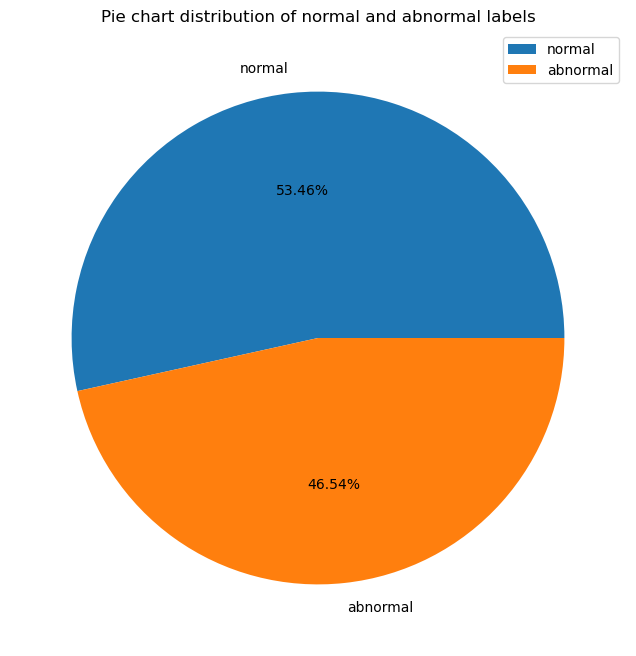

In [32]:
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [33]:
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [34]:
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [35]:
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,False,False,False,False,True,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,False,False,False,False,True,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,True,False,False,False,False,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,False,False,False,False,True,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,False,False,False,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,True,False,False,False,False,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,False,False,False,False,True,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,False,False,False,False,True,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,True,False,False,False,False,Dos


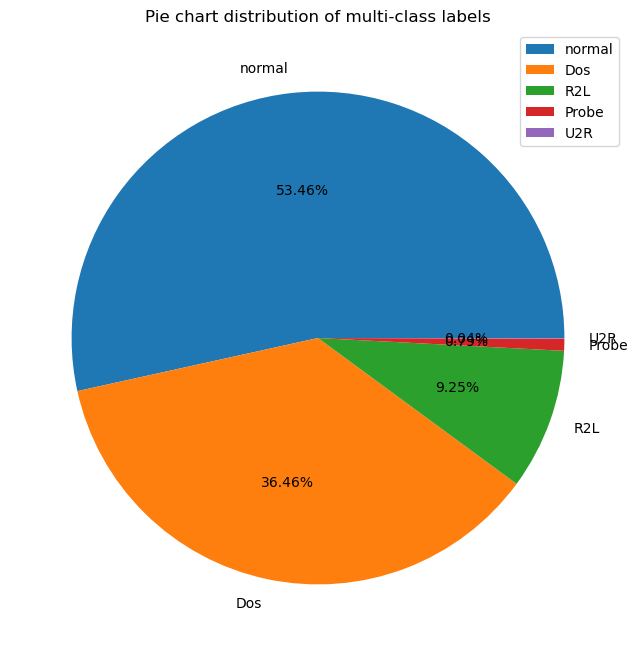

In [36]:
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

# **Feature Selection and Extraction**

In [37]:
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

In [38]:
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [39]:
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [40]:

numeric_bin = numeric_bin.join(categorical)
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [41]:
bin_data.to_csv("./datasets/bin_data.csv")
bin_data

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,False,...,False,False,False,False,True,False,1,False,True,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,False,...,False,False,False,False,True,False,1,False,True,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,False,...,True,False,False,False,False,False,0,True,False,abnormal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,False,...,False,False,False,False,True,False,1,False,True,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,False,...,False,False,False,False,True,False,1,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,False,...,True,False,False,False,False,False,0,True,False,abnormal
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,False,...,False,False,False,False,True,False,1,False,True,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,False,...,False,False,False,False,True,False,1,False,True,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,False,...,True,False,False,False,False,False,0,True,False,abnormal


In [43]:
bin_data.columns

Index(['count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'logged_in', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'same_srv_rate', 'protocol_type_icmp',
       'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime',
       'service_discard', 'service_domain', 'service_domain_u', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec',
       'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher',
       'service_harvest', 'service_hostnames', 'service_http',
       'service_http_2784', 'service_http_443', 'service_http_8001',
       'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell',
       'service_ldap', 'service_link', 'service_login', 'service_mtp',
       'service_name', 'service_netbios_d

In [44]:
len(bin_data.columns)

97

# **Model Building**

# Logistic Regression

In [114]:
X = bin_data.iloc[:,0:93].to_numpy() 
Y = bin_data['intrusion'] 

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [116]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [117]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.97085159077919


In [118]:
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.98      0.96      0.97     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



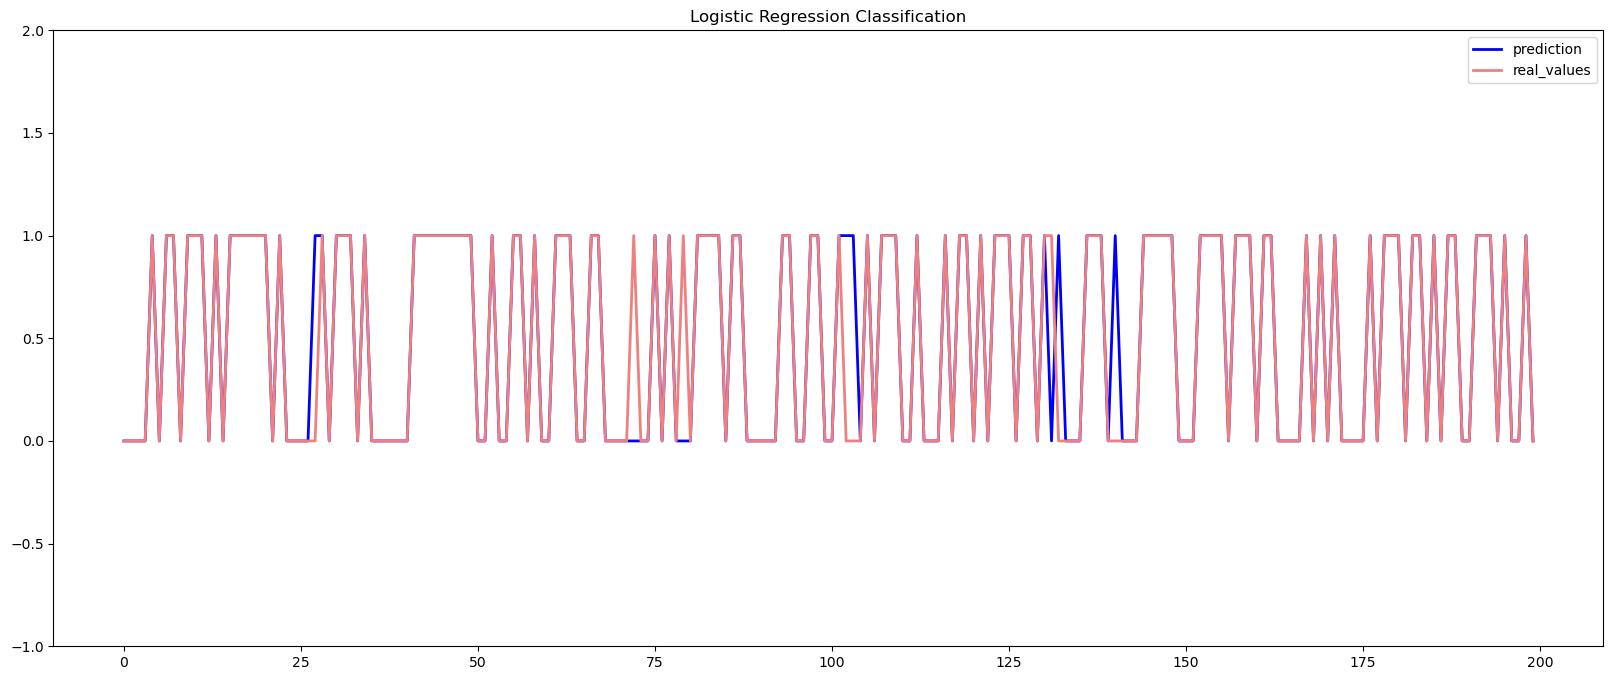

In [119]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Logistic Regression Classification")
plt.show()

# Linear Support Vector Machine Classifier

In [34]:
X = bin_data.iloc[:,0:93].to_numpy() 
Y = bin_data['intrusion'] 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [36]:
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) 

SVC(gamma='auto', kernel='linear')

In [37]:
y_pred = lsvm.predict(X_test) 
ac = accuracy_score(y_test, y_pred)*100 
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69460849685655


In [38]:
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



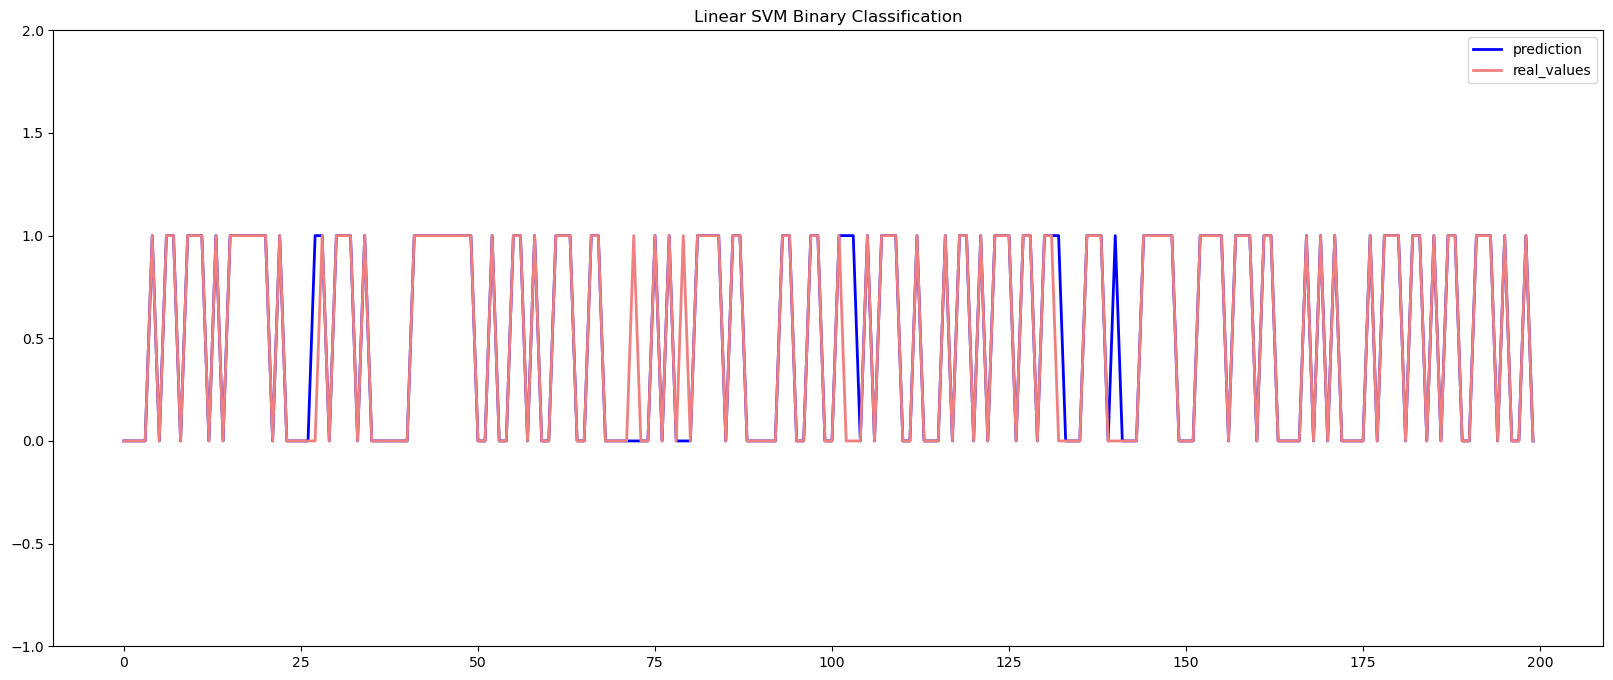

In [39]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Linear SVM Binary Classification")
plt.show()

# Naive Bayes

In [40]:
X = bin_data.iloc[:,0:93].to_numpy() 
Y = bin_data['intrusion'] 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [42]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = gnb.predict(X_test)
acc=accuracy_score(y_test, y_pred)*100
print(acc)

84.32717342985966


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80     14720
           1       0.77      1.00      0.87     16774

    accuracy                           0.84     31494
   macro avg       0.88      0.83      0.84     31494
weighted avg       0.88      0.84      0.84     31494



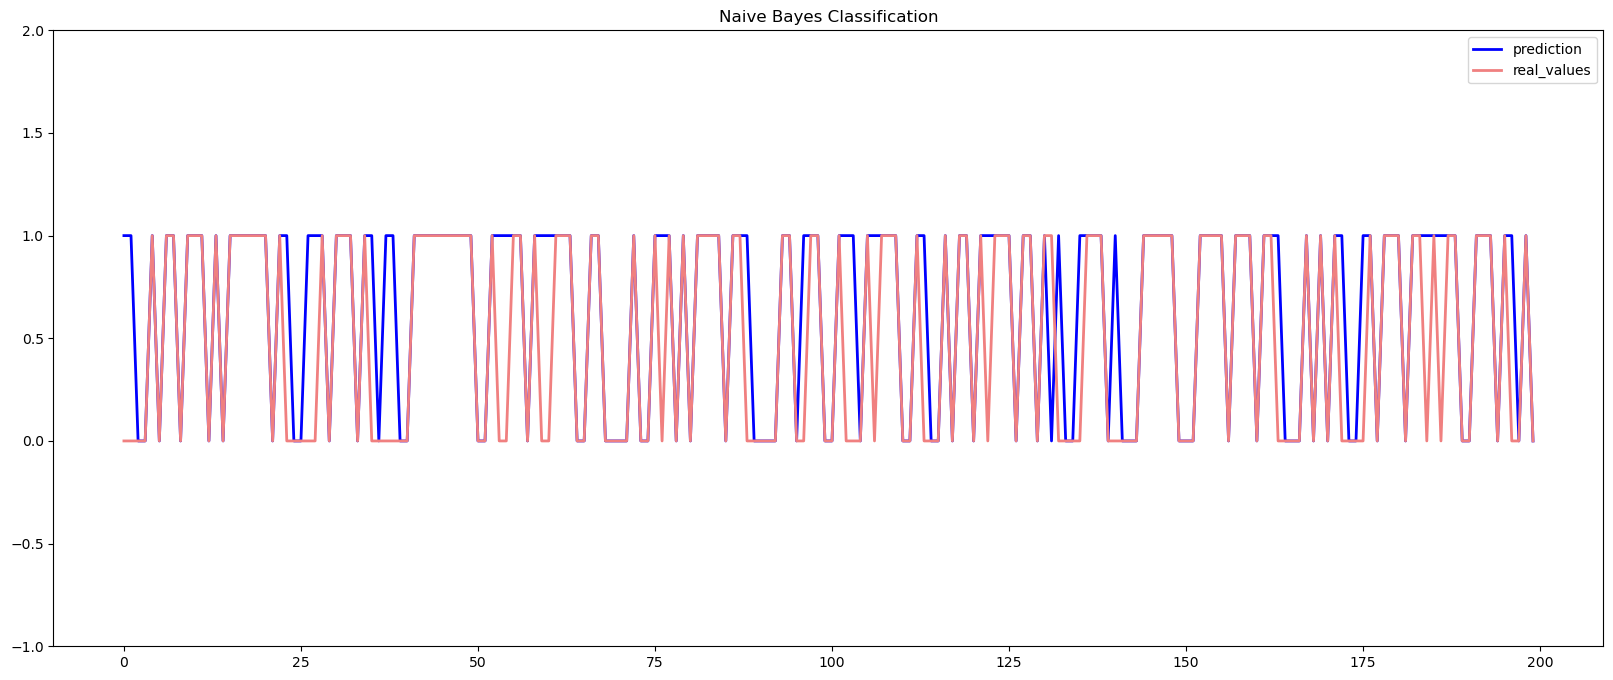

In [45]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Naive Bayes Classification")
plt.show()

# Decision Tree

In [46]:
X = bin_data.iloc[:,0:93].to_numpy() 
Y = bin_data['intrusion'] 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [48]:
ent = DecisionTreeClassifier(criterion="entropy",
                                      random_state=100, max_depth=3, min_samples_leaf=5)
 
ent.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [49]:
y_pred = ent.predict(X_test)
acc=accuracy_score(y_test, y_pred)*100
print(acc)

95.29116657141043


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     14720
           1       0.94      0.97      0.96     16774

    accuracy                           0.95     31494
   macro avg       0.95      0.95      0.95     31494
weighted avg       0.95      0.95      0.95     31494



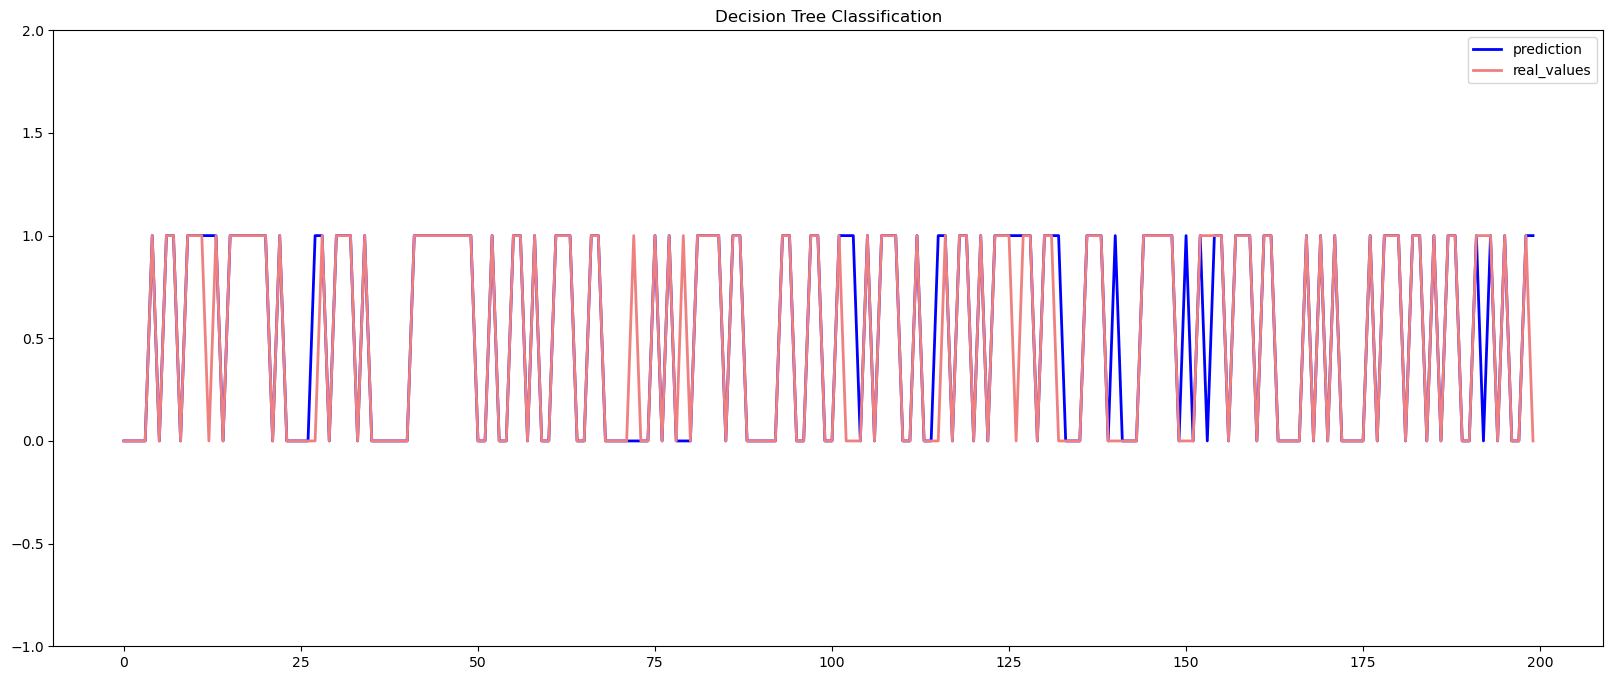

In [51]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Decision Tree Classification")
plt.show()

# Random Forest

In [52]:
X = bin_data.iloc[:,0:93].to_numpy() 
Y = bin_data['intrusion'] 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [54]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [55]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(accuracy)

98.72039118562266


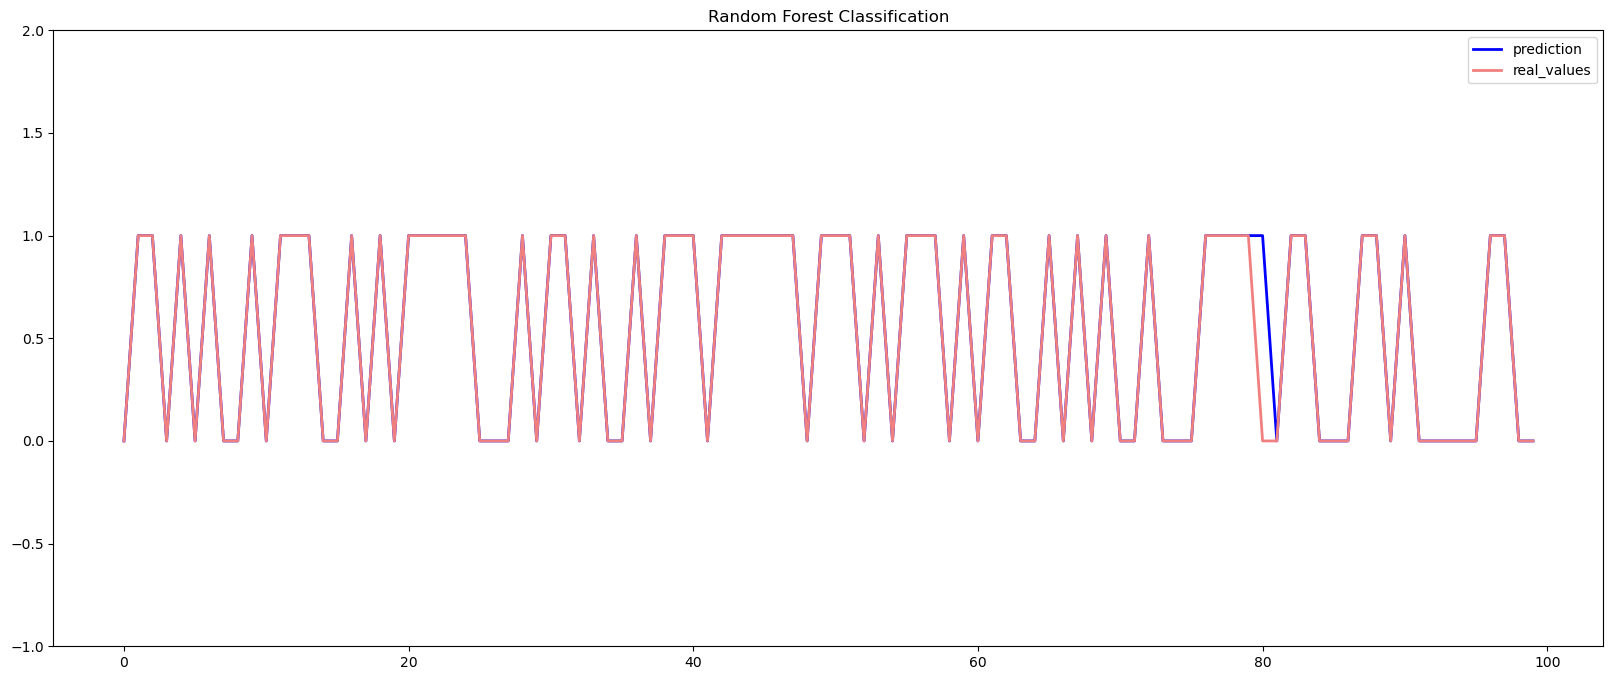

In [57]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("Random Forest Classification")
plt.show()

In [58]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14720
           1       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



# K-nearest-neighbor Classifier

In [59]:
X = bin_data.iloc[:,0:93].to_numpy() 
Y = bin_data['intrusion'] 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [61]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) 

KNeighborsClassifier()

In [62]:
y_pred=knn.predict(X_test) 
ac=accuracy_score(y_test, y_pred)*100 
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.5711564107449


In [63]:
print(classification_report(y_test, y_pred,target_names=le1.classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



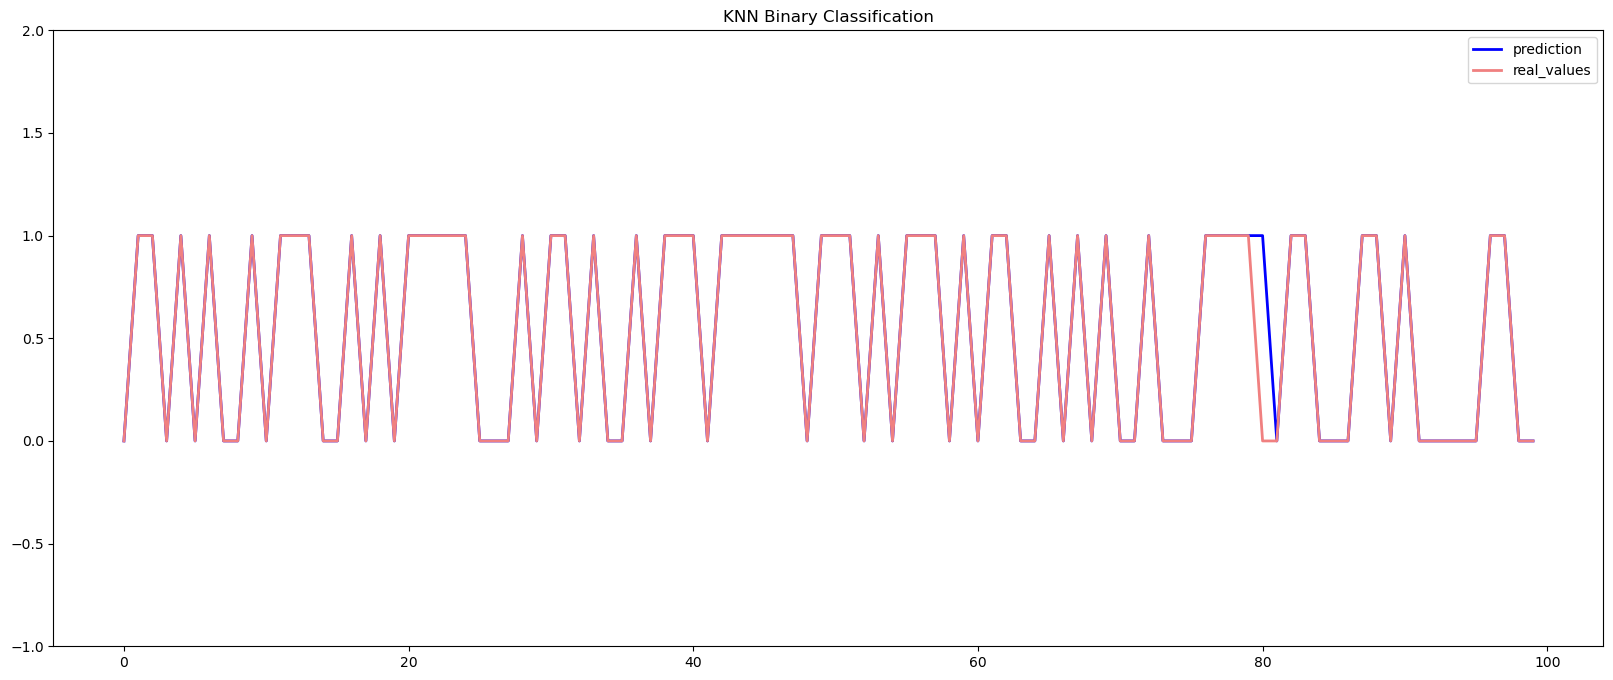

In [64]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-1,2))
plt.title("KNN Binary Classification")
plt.show()

# Principle Component Analysis

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train, y_train) 

PCA(n_components=2)

In [66]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [67]:
print(explained_variance)

[0.63737288 0.12436928]


# Multi Layer Perceptron Classifier

In [68]:
X = bin_data.iloc[:,0:93]
Y = bin_data[['intrusion']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [70]:
mlp = Sequential() 

mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dense(units=1,activation='sigmoid'))

2024-04-27 13:55:17.080355: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-27 13:55:17.080379: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-27 13:55:17.080388: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-27 13:55:17.080416: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-27 13:55:17.080430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [71]:
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4751 (18.56 KB)
Trainable params: 4751 (18.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:

history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100


2024-04-27 13:55:17.445389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 24ms/step - loss: 0.5025 - accuracy: 0.8241 - val_loss: 0.3694 - val_accuracy: 0.8746
Epoch 2/100
 9/16 [===============>..............] - ETA: 0s - loss: 0.3388 - accuracy: 0.8847

2024-04-27 13:55:17.911211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 8ms/step - loss: 0.3207 - accuracy: 0.8881 - val_loss: 0.2728 - val_accuracy: 0.8978
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2524 - accuracy: 0.8996 - val_loss: 0.2292 - val_accuracy: 0.9051
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2168 - accuracy: 0.9067 - val_loss: 0.2024 - val_accuracy: 0.9157
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1933 - accuracy: 0.9181 - val_loss: 0.1835 - val_accuracy: 0.9294
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1761 - accuracy: 0.9358 - val_loss: 0.1694 - val_accuracy: 0.9451
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1630 - accuracy: 0.9474 - val_loss: 0.1585 - val_accuracy: 0.9512
Epoch 8/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1530 - accuracy: 0.9530 - val_loss: 0.1501 - val_accuracy: 0.9552
Epoch 9/100
16/16 [======

In [74]:
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
import tensorflow as tf

X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

test_results = mlp.evaluate(X_test_tensor, y_test_tensor, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')


 31/985 [..............................] - ETA: 3s - loss: 0.1165 - accuracy: 0.9637

2024-04-27 13:55:30.650335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


985/985 [==============================] - 4s 3ms/step - loss: 0.0940 - accuracy: 0.9695
Test results - Loss: 0.09399237483739853 - Accuracy: 96.95497751235962


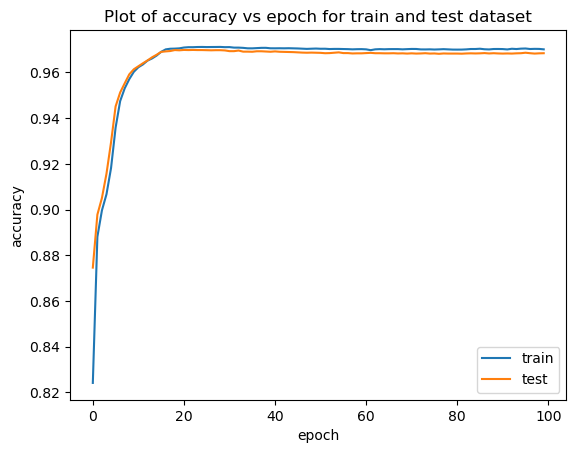

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

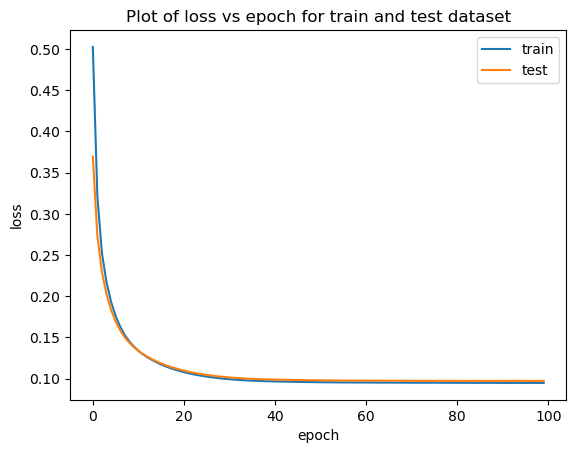

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [78]:
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_pred = mlp.predict(X_test_tensor).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

124/985 [==>...........................] - ETA: 1s

2024-04-27 13:55:34.426344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


985/985 [==============================] - 1s 1ms/step


In [79]:
import numpy as np

X_test = X_test.astype('float32')  
X_test = np.nan_to_num(X_test) 

pred = mlp.predict(X_test)


if np.issubdtype(pred.dtype, np.floating):  
    y_classes = (pred > 0.5).astype('int32') 
    print(y_classes) 
else:
    print("Model output dtype is not floating-point.")

if np.isnan(pred).any() or np.isinf(pred).any():
    pred = np.nan_to_num(pred)


985/985 [==============================] - 1s 1ms/step
[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [80]:
print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9802074639322761
F1 Score -  0.971663268622758
Precision Score -  0.963266740875271
